# MANE-4962 HW 4
Jean Pasato
661955756

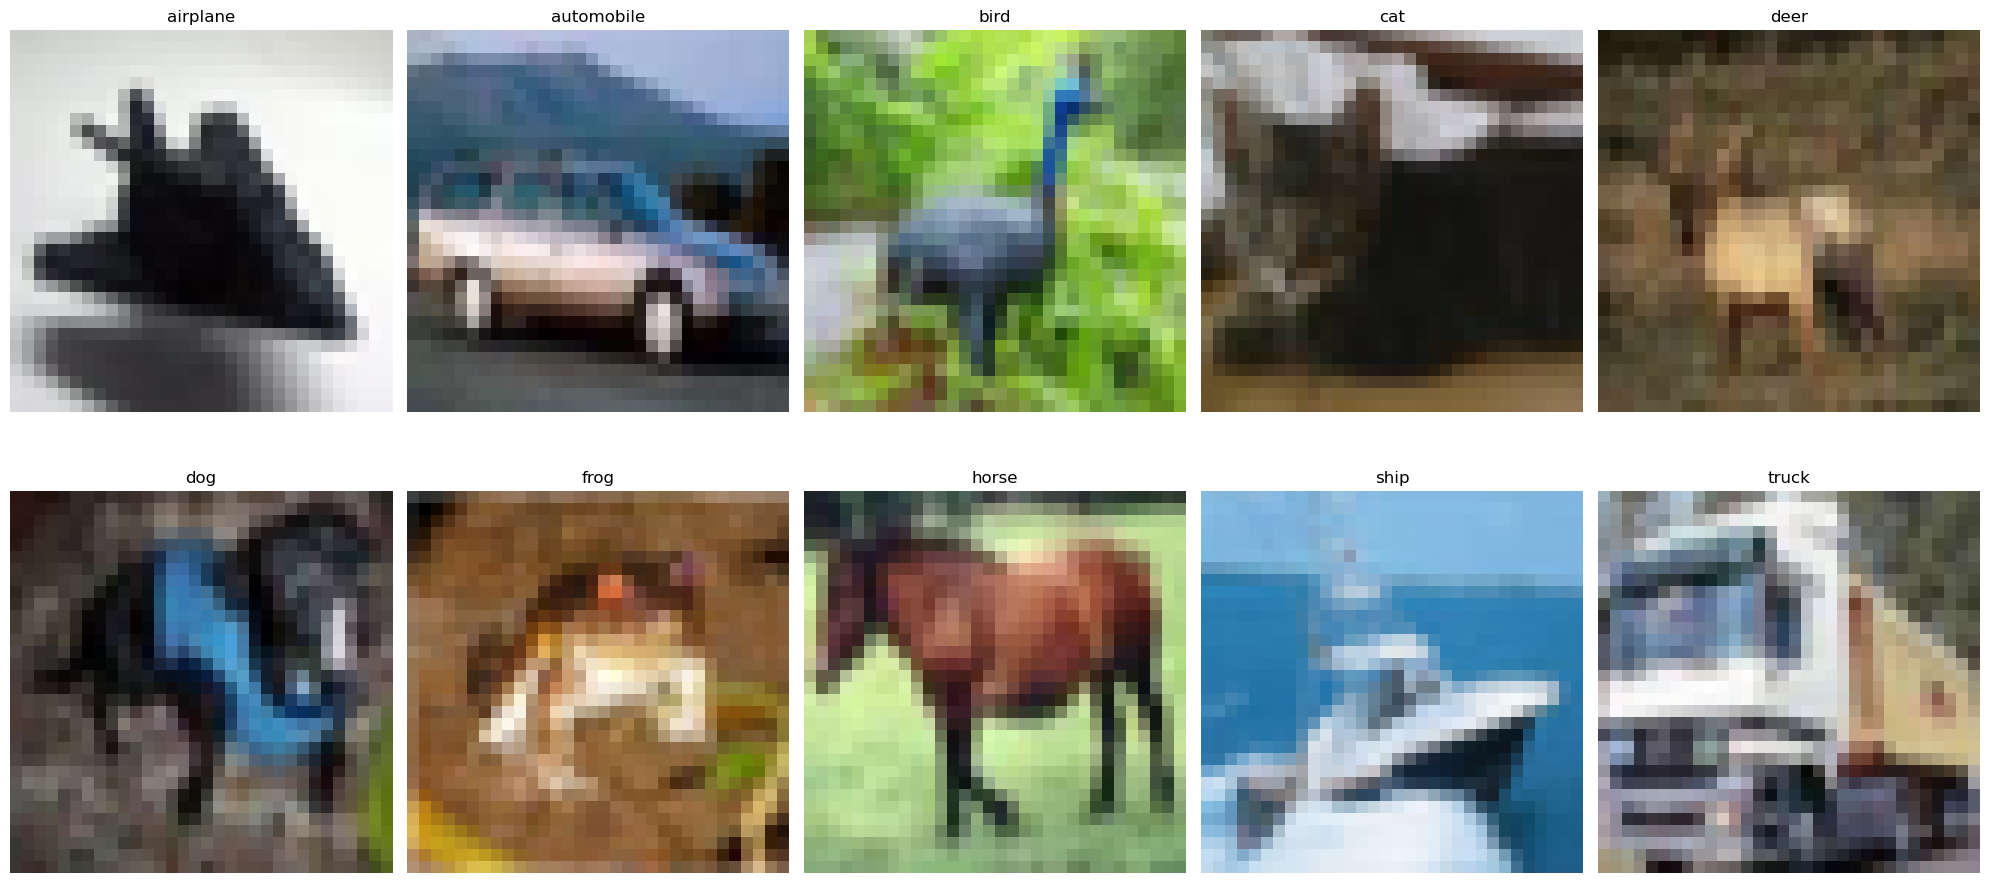

In [29]:
### PROBLEM 1a:

# Neural Network Model that classifies the CIFAR-10 dataset
    # Use a 70-30 split for training and validation data
    
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Define classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig, axes = plt.subplots(2, 5, figsize = (20,10))
axes = axes.ravel()

for i in range(len(classes)):
    ident = np.argmax(y_train == i)
    axes[i].imshow(x_train[ident])
    axes[i].set_title(classes[i])
    axes[i].axis("off")
    
plt.tight_layout()
plt.show()

In [30]:
### PROBLEM 1B:

# After tuning, choose different number of neurons for each layer

# Process Data
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print(x_train.shape[0])
print(x_test.shape[0])
x_train = x_train.reshape(x_train.shape[0], 32*32*3)
x_test = x_test.reshape(x_test.shape[0], 32*32*3)

# Define Hidden Layers
hidden_layers = [2,3,4,5,6,7,8,9,10]
units_per_layer = [500]
learning_rates = [0.0001]

# Searchs for the best number of layers with a dictionary
params_dict = dict()

for hidden_layer in hidden_layers:
    for units in units_per_layer:
        for learning_rate in learning_rates:
            model = Sequential()
            model.add(Dense(units, activation='relu', input_shape=[32*32*3]))
            for i in range(hidden_layer - 1):
                model.add(Dense(units, activation='relu'))
            model.add(Dense(1))
            opt = optimizers.Adam(learning_rate=learning_rate)
            mse = tf.keras.losses.MeanSquaredError(reduction=
            tf.keras.losses.Reduction.SUM)
            model.compile(loss=mse, optimizer=opt)
            history = model.fit(x_train,y_train,
            validation_split=0.3,
            epochs=10, verbose=0)
            loss = model.evaluate(x_test,y_test, verbose=0)
            print(f'hidden layers = {hidden_layer} units_per_layer = {units} learning_rate = {learning_rate} loss = {loss}')

def dummy_model(l1, l2, l3, l4,l5,l6):
    model = Sequential()
    model.add(Dense(l1, activation='relu', input_shape=(32*32*3,)))
    model.add(Dense(l2, activation='relu'))
    model.add(Dense(l3, activation='relu'))
    model.add(Dense(l4, activation='relu'))
    model.add(Dense(l5, activation='relu'))
    model.add(Dense(l6, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    opt = optimizers.Adam(learning_rate = 0.0001)
    model.compile(optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy'])
    return model
            

# Make each layer smaller, making a different number of neurons for each layer each time
layer1_vals = [512, 1024, 2048]
layer2_vals = [256, 512, 1024]
layer3_vals = [128, 256, 512]
layer4_vals = [64, 128,256]
layer5_vals = [32, 64, 128]
layer6_vals = [16, 32, 64]

loss_tracking = [] # to keep track of the loss values for each architecture of the model
for l1 in layer1_vals:
    for l2 in layer2_vals:
        for l3 in layer3_vals:
            for l4 in layer4_vals:
                for l5 in layer5_vals:
                    for l6 in layer6_vals:
                        model = dummy_model(layer1, layer2, layer3, layer4, layer5, layer6)
                        model.fit(x_train, y_train,epochs=10,batch_size=64,verbose=0,validation_split=0.3,)
                        evaluation=model.evaluate(x_test, y_test)
                        loss=evaluation[0]
                        acc=evaluation[1]
                        info = [l1, l2, l3, l4, l5, l6, loss, acc]
                        print(f"Model architecture: {l1} {l2} {l3} {l4} {l5} {l6} loss:{loss}, acc:{acc}")
                        loss_tracking.append(info)
                    

50000
10000
hidden layers = 2 units_per_layer = 500 learning_rate = 0.0001 loss = 2.8777921199798584
hidden layers = 3 units_per_layer = 500 learning_rate = 0.0001 loss = 2.877756357192993
hidden layers = 4 units_per_layer = 500 learning_rate = 0.0001 loss = 2.877704381942749
hidden layers = 5 units_per_layer = 500 learning_rate = 0.0001 loss = 2.8777008056640625
hidden layers = 6 units_per_layer = 500 learning_rate = 0.0001 loss = 2.8777010440826416
hidden layers = 7 units_per_layer = 500 learning_rate = 0.0001 loss = 2.877700090408325
hidden layers = 8 units_per_layer = 500 learning_rate = 0.0001 loss = 2.877700090408325
hidden layers = 9 units_per_layer = 500 learning_rate = 0.0001 loss = 2.877699851989746
hidden layers = 10 units_per_layer = 500 learning_rate = 0.0001 loss = 2.877699851989746


NameError: name 'layer1' is not defined

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(3072,)),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    ])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=200, batch_size=64, validation_split=0.3,verbose=0)

KeyboardInterrupt: 

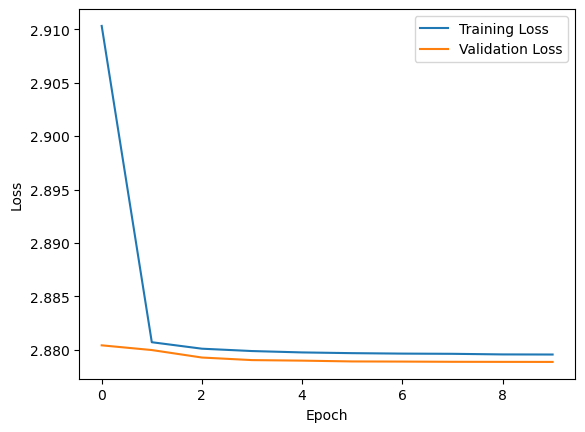

In [27]:
### PROBLEM 1C:

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

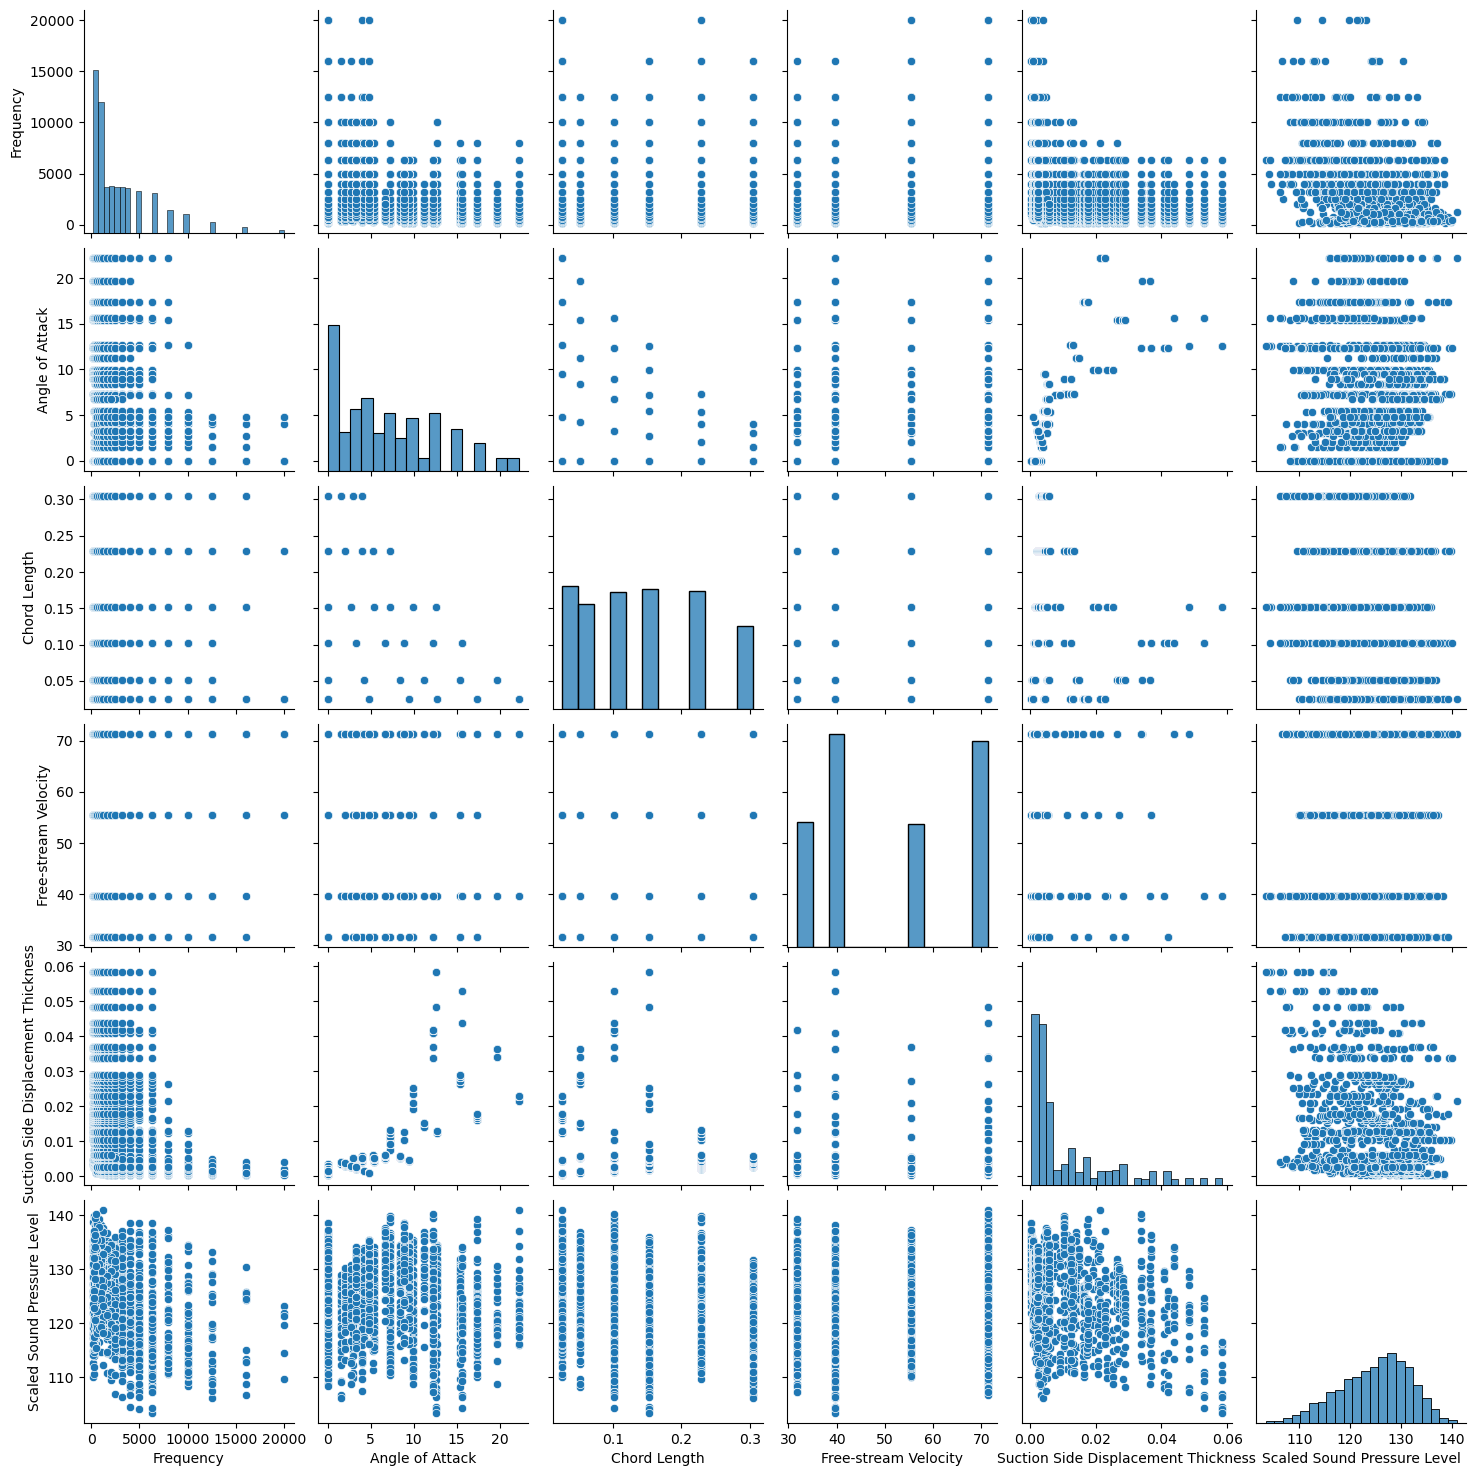

In [47]:
### PROBLEM 2A:

import pandas as pd
import numpy as np
import seaborn as sns

# Load Data
df = pd.read_csv("airfoil_self_noise.dat", delim_whitespace=True, names=['Frequency',
'Angle of Attack',
'Chord Length',
'Free-stream Velocity',
'Suction Side Displacement Thickness',
'Scaled Sound Pressure Level'])

# Display as seaborn plot

sns.pairplot(df)

In [51]:
### PROBLEM 2B:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

y=df['Scaled Sound Pressure Level'].to_numpy()
X= df.to_numpy()

X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.2,
    random_state=123,
    shuffle=True)

x_train = X_train.astype('float32') / 255
x_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train, 115)
y_test = to_categorical(y_test, 115)

model = Sequential()
model.add(Conv2D(filters=3, kernel_size=(3, 3),strides=(1, 1), padding='valid', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2),  strides=(2,2)))
model.add(Conv2D(filters=3, kernel_size=(3, 3),strides=(1, 1), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),  strides=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

y_pred = model.predict(x_test)

# Calculate Coefficient of Determination
r2 = r2_score(y_test, y_pred)
print('Coefficient of determination:', r2)

IndexError: index 115 is out of bounds for axis 1 with size 115